In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import models
import tqdm.notebook
import numpy as np

In [2]:
def get_all_measures(mu1, mu2, theta12, theta21, bound=25):
    probs = models.get_state_probabilities(
        num_classes=2,
        num_servers=1,
        arrival_rates=[1, 1],
        service_rates=[mu1, mu2],
        thetas=[[None, theta12], [theta21, None]],
        bound=bound
    )
    relative_prob = models.get_relative_prob_at_boundary(
        probs=probs,
        boundary=bound
    )
    states_sj, transmat_sj = models.build_state_space_and_transition_matrix_sojourn_mc(
        num_classes=2,
        num_servers=1,
        arrival_rates=[1, 1],
        service_rates=[mu1, mu2],
        thetas=[[None, theta12], [theta21, None]],
        bound=bound
    )
    p_hit_bound = models.get_probability_of_hitting_boundary(
        state_space=states_sj,
        transition_matrix=transmat_sj,
        boundary=bound,
        arrival_rates=[1, 1],
        probs=probs,
    )
    num_custs = models.get_average_num_of_customers_from_state_probs(
        state_probs=probs,
        num_classes=2
    )
    mean_sojourn_times = models.get_mean_sojourn_times(
        state_space_sojourn=states_sj,
        transition_matrix_sojourn=transmat_sj,
        num_classes=2,
        arrival_rates=[1, 1],
        probs=probs
    )
    return relative_prob, p_hit_bound, num_custs[0], num_custs[1], mean_sojourn_times[0], mean_sojourn_times[1]

In [3]:
def run_scenario_experiments(mu1, mu2, theta12s, theta21s, bound=25):
    results = {
        'relative_prob': {},
        'p_hit_bound': {},
        'num_cust1': {},
        'num_cust2': {},
        'mean_sojourn1': {},
        'mean_sojourn2': {}
    }
    for theta12 in tqdm.notebook.tqdm(theta12s, desc="Theta_12", position=0):
        results['relative_prob'][theta12] = {}
        results['p_hit_bound'][theta12] = {}
        results['num_cust1'][theta12] = {}
        results['num_cust2'][theta12] = {}
        results['mean_sojourn1'][theta12] = {}
        results['mean_sojourn2'][theta12] = {}
        for theta21 in tqdm.notebook.tqdm(theta21s, desc="Theta_21", position=1, leave=False):
            relative_prob, p_hit_bound, num_cust1, num_cust2, mean_sojourn1, mean_sojourn2 = get_all_measures(mu1=mu1, mu2=mu2, theta12=theta12, theta21=theta21, bound=bound)
            results['relative_prob'][theta12][theta21] = relative_prob
            results['p_hit_bound'][theta12][theta21] = p_hit_bound
            results['num_cust1'][theta12][theta21] = num_cust1
            results['num_cust2'][theta12][theta21] = num_cust2
            results['mean_sojourn1'][theta12][theta21] = mean_sojourn1
            results['mean_sojourn2'][theta12][theta21] = mean_sojourn2
    return results

In [29]:
def plot_mean_num_custs(results, theta12s, theta21s):
    fig, axarr = plt.subplots(1, 2, figsize=(11, 5))
    num_cust1s = [[results['num_cust1'][theta12][theta21] for theta21 in theta21s] for theta12 in theta12s]
    num_cust2s = [[results['num_cust2'][theta12][theta21] for theta21 in theta21s] for theta12 in theta12s]
    
    vmin = min(min(min(row) for row in num_cust1s), min(min(row) for row in num_cust2s))
    vmax = max(max(max(row) for row in num_cust1s), max(max(row) for row in num_cust2s))
    
    divider = make_axes_locatable(axarr[1])
    cax = divider.append_axes('right', size='5%', pad=0.15)
    
    axarr[0].pcolormesh(theta21s, theta12s, num_cust1s, cmap='viridis', vmin=vmin, vmax=vmax)
    axarr[0].set_ylabel(r"$\theta_{12}$", fontsize=14, rotation=0, labelpad=15)
    axarr[0].set_xlabel(r"$\theta_{21}$", fontsize=14)
    axarr[0].set_title("Mean Number of Class 1 Customers", fontsize=14)
    
    im = axarr[1].pcolormesh(theta21s, theta12s, num_cust2s, cmap='viridis', vmin=vmin, vmax=vmax)
    axarr[1].set_ylabel(r"$\theta_{12}$", fontsize=14, rotation=0, labelpad=15)
    axarr[1].set_xlabel(r"$\theta_{21}$", fontsize=14)
    axarr[1].set_title("Mean Number of Class 2 Customers", fontsize=14)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    divider = make_axes_locatable(axarr[0])
    cax2 = divider.append_axes('left', size='5%', pad=0.15)
    cax2.axis('off')
    
    return fig

In [30]:
def plot_mean_sojourn_time(results, theta12s, theta21s):
    fig, axarr = plt.subplots(1, 2, figsize=(11, 5))
    sojourn_cust1s = [[results['mean_sojourn1'][theta12][theta21] for theta21 in theta21s] for theta12 in theta12s]
    sojourn_cust2s = [[results['mean_sojourn2'][theta12][theta21] for theta21 in theta21s] for theta12 in theta12s]
    
    vmin = min(min(min(row) for row in sojourn_cust1s), min(min(row) for row in sojourn_cust2s))
    vmax = max(max(max(row) for row in sojourn_cust1s), max(max(row) for row in sojourn_cust2s))
    
    divider = make_axes_locatable(axarr[1])
    cax = divider.append_axes('right', size='5%', pad=0.15)
    
    axarr[0].pcolormesh(theta21s, theta12s, sojourn_cust1s, cmap='viridis', vmin=vmin, vmax=vmax)
    axarr[0].set_ylabel(r"$\theta_{12}$", fontsize=14, rotation=0, labelpad=15)
    axarr[0].set_xlabel(r"$\theta_{21}$", fontsize=14)
    axarr[0].set_title("Mean Sojourn Time (Class 1 Customers)", fontsize=14)
    
    im = axarr[1].pcolormesh(theta21s, theta12s, sojourn_cust2s, cmap='viridis', vmin=vmin, vmax=vmax)
    axarr[1].set_ylabel(r"$\theta_{12}$", fontsize=14, rotation=0, labelpad=15)
    axarr[1].set_xlabel(r"$\theta_{21}$", fontsize=14)
    axarr[1].set_title("Mean Sojourn Time (Class 2 Customers)", fontsize=14)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    divider = make_axes_locatable(axarr[0])
    cax2 = divider.append_axes('left', size='5%', pad=0.15)
    cax2.axis('off')
    
    return fig

In [6]:
theta12s = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3.0]
theta21s = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3.0]
bound = 16

# Scenario 1

In [7]:
results_1 = run_scenario_experiments(mu1=5/2, mu2=7/2, theta12s=theta12s, theta21s=theta21s, bound=bound)

Theta_12:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

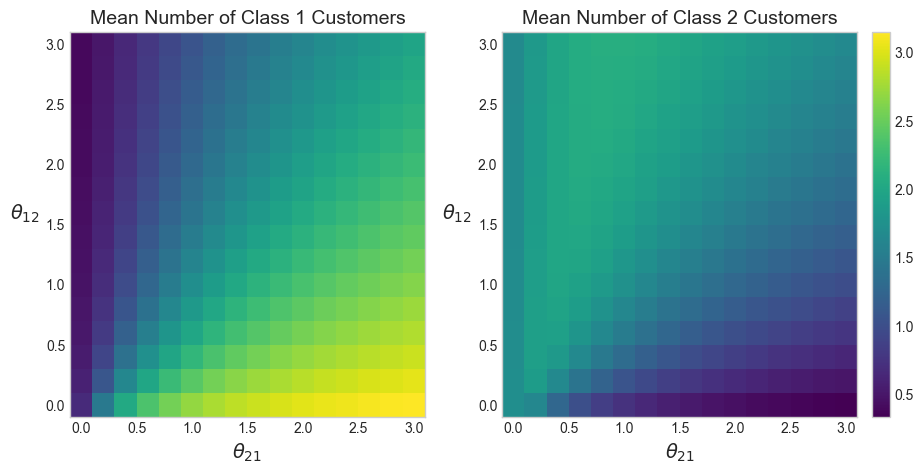

In [31]:
fig_1n = plot_mean_num_custs(results_1, theta12s, theta21s);
fig_1n.savefig('../tex/img/vary_thetas_meancusts_scen1.pdf')

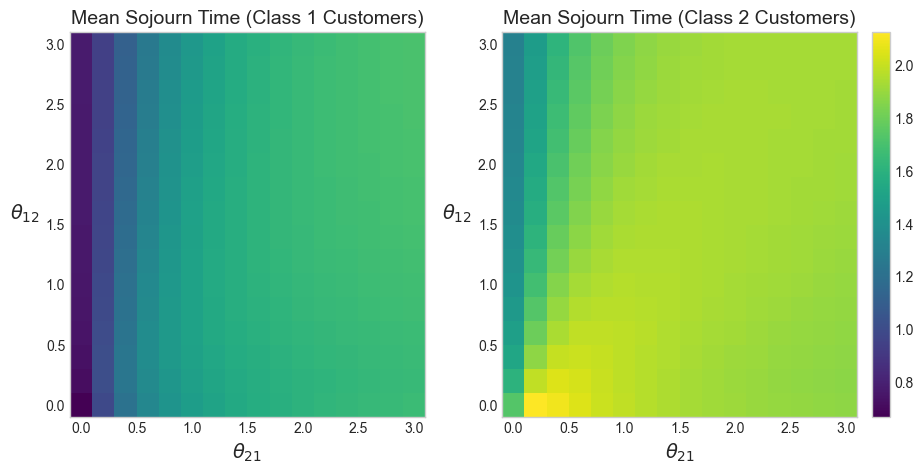

In [32]:
fig_1s = plot_mean_sojourn_time(results_1, theta12s, theta21s);
fig_1s.savefig('../tex/img/vary_thetas_sojourn_scen1.pdf')

In [16]:
max(results_1['relative_prob'][th12][th21] for th12 in theta12s for th21 in theta21s)

0.08224385135073521

In [17]:
max(results_1['p_hit_bound'][th12][th21] for th12 in theta12s for th21 in theta21s)

0.011957288916284125

# Scenario 2

In [10]:
results_2 = run_scenario_experiments(mu1=7/2, mu2=5/2, theta12s=theta12s, theta21s=theta21s, bound=bound)

Theta_12:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

Theta_21:   0%|          | 0/16 [00:00<?, ?it/s]

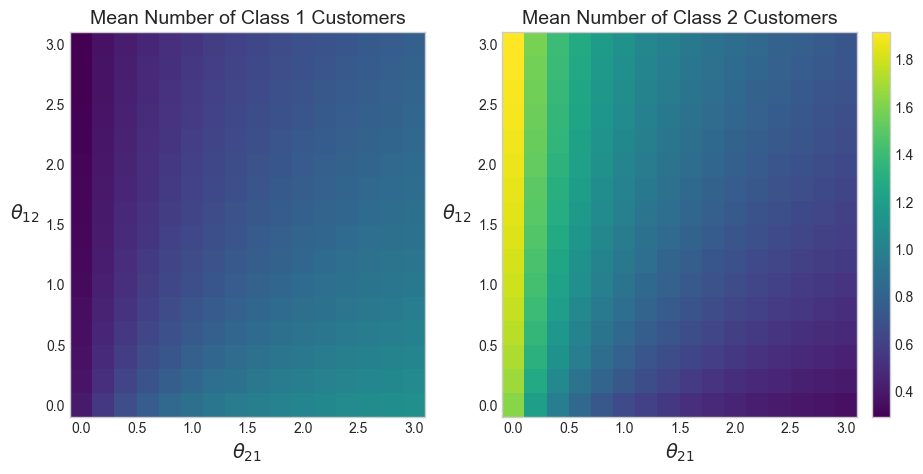

In [33]:
fig_2n = plot_mean_num_custs(results_2, theta12s, theta21s);
fig_2n.savefig('../tex/img/vary_thetas_meancusts_scen2.pdf')

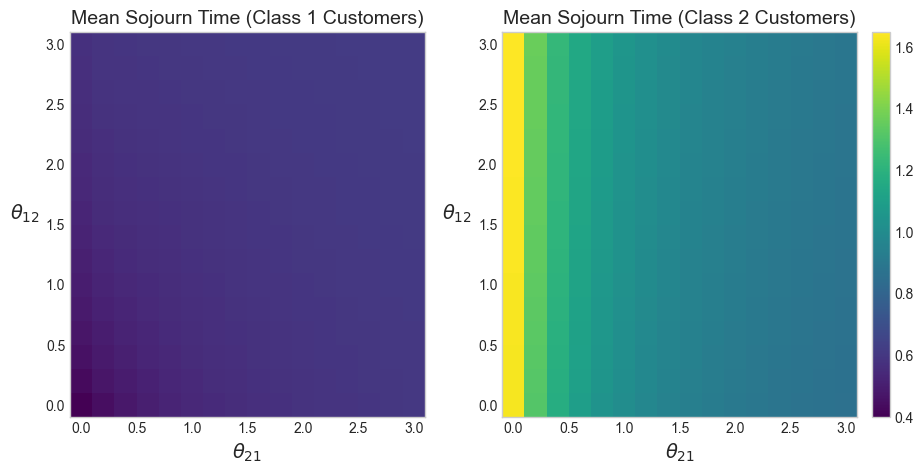

In [34]:
fig_2s = plot_mean_sojourn_time(results_2, theta12s, theta21s);
fig_2s.savefig('../tex/img/vary_thetas_sojourn_scen2.pdf')

In [18]:
max(results_2['relative_prob'][th12][th21] for th12 in theta12s for th21 in theta21s)

0.010165286908989124

In [19]:
max(results_2['p_hit_bound'][th12][th21] for th12 in theta12s for th21 in theta21s)

0.0015152087692008147

# Equal thetas

In [111]:
thetas = np.linspace(0, 4, 41)

In [112]:
theta_magnitudeA = [get_all_measures(mu1=5/2, mu2=7/2, theta12=t, theta21=t, bound=16) for t in tqdm.notebook.tqdm(thetas)]

  0%|          | 0/41 [00:00<?, ?it/s]

In [113]:
theta_magnitudeB = [get_all_measures(mu1=7/2, mu2=5/2, theta12=t, theta21=t, bound=16) for t in tqdm.notebook.tqdm(thetas)]

  0%|          | 0/41 [00:00<?, ?it/s]

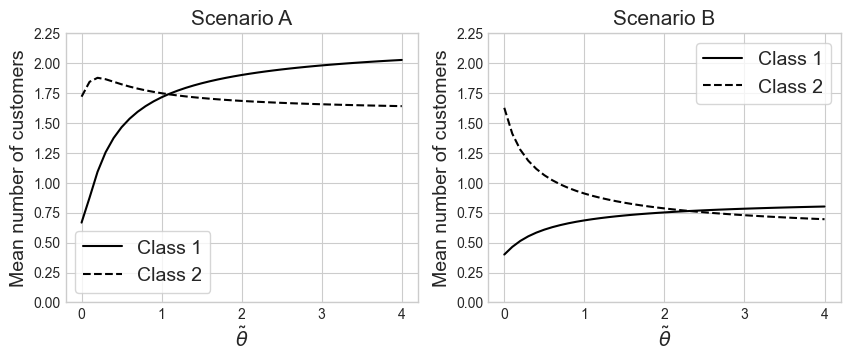

In [119]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 3.5))
axarr[0].plot(thetas, [r[2] for r in theta_magnitudeA], c='black', linestyle='solid', label="Class 1")
axarr[0].plot(thetas, [r[3] for r in theta_magnitudeA], c='black',linestyle='dashed', label="Class 2")
axarr[0].set_xlabel(r"$\tilde{\theta}$", fontsize=14)
axarr[0].legend(frameon=True, fontsize=14)
axarr[0].set_ylabel("Mean number of customers", fontsize=14)
axarr[0].set_ylim(0, 2.25)
axarr[0].set_title("Scenario A", fontsize=15)
axarr[1].plot(thetas, [r[2] for r in theta_magnitudeB], c='black', linestyle='solid', label="Class 1")
axarr[1].plot(thetas, [r[3] for r in theta_magnitudeB], c='black',linestyle='dashed', label="Class 2")
axarr[1].set_xlabel(r"$\tilde{\theta}$", fontsize=14)
axarr[1].legend(frameon=True, fontsize=14)
axarr[1].set_ylabel("Mean number of customers", fontsize=14)
axarr[1].set_ylim(0, 2.25)
axarr[1].set_title("Scenario B", fontsize=15)
fig.savefig("../tex/img/mean_custs_equal_theta.pdf")

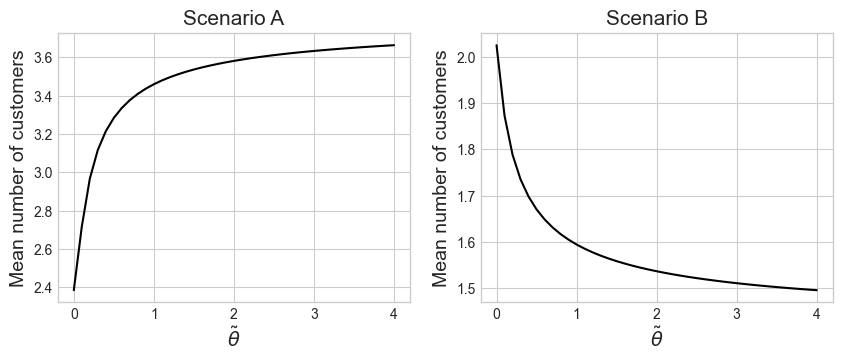

In [125]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 3.5))
axarr[0].plot(thetas, [r[2] + r[3] for r in theta_magnitudeA], c='black')
axarr[1].plot(thetas, [r[2] + r[3] for r in theta_magnitudeB], c='black')
axarr[0].set_ylabel("Mean number of customers", fontsize=14)
axarr[1].set_ylabel("Mean number of customers", fontsize=14)
axarr[0].set_xlabel(r"$\tilde{\theta}$", fontsize=14)
axarr[1].set_xlabel(r"$\tilde{\theta}$", fontsize=14)
axarr[0].set_title("Scenario A", fontsize=15)
axarr[1].set_title("Scenario B", fontsize=15)
fig.savefig("../tex/img/mean_custs_equal_theta_overall.pdf")